In [1]:
myfile=r'../data/winequality-white.csv'

import pandas as pd
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import  silhouette_score

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

wine=pd.read_csv(myfile,sep=";")

In [2]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
wine.shape

(4898, 12)

In [4]:
wine=wine[["sulphates","alcohol"]]

In [5]:
wine.shape

(4898, 2)

In [6]:
wine.head()

,sulphates,alcohol
0,0.45,8.8
1,0.49,9.5
2,0.44,10.1
3,0.40,9.9
4,0.40,9.9


In [7]:
wine.agg(['mean','std'])

,sulphates,alcohol
mean,0.489847,10.514267
std,0.114126,1.230621


In [8]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()

In [9]:
wine_std=pd.DataFrame(st.fit_transform(wine),
                      columns=list(wine.columns))

In [10]:
wine_std.agg(['mean','std'])

,sulphates,alcohol
mean,-7.572999e-16,-2.169718e-15
std,1.000102e+00,1.000102e+00


In [11]:
from sklearn.cluster import AgglomerativeClustering

In [12]:
for n_clusters in range(2,10):
    cluster_model = AgglomerativeClustering(n_clusters=n_clusters, 
                                            affinity='euclidean',
                                            linkage='ward')
    cluster_labels = cluster_model.fit_predict(wine_std)
    silhouette_avg = silhouette_score(wine_std,cluster_labels,metric='euclidean')
    print("For n_clusters =", n_clusters, 
          "The average silhouette_score is:", silhouette_avg)

For n_clusters = 2 The average silhouette_score is: 0.3091095689547383
For n_clusters = 3 The average silhouette_score is: 0.36507065689263013
For n_clusters = 4 The average silhouette_score is: 0.36394118955693916
For n_clusters = 5 The average silhouette_score is: 0.2849369402765109
For n_clusters = 6 The average silhouette_score is: 0.28173689619112985
For n_clusters = 7 The average silhouette_score is: 0.30584775050004287
For n_clusters = 8 The average silhouette_score is: 0.29918403546397854
For n_clusters = 9 The average silhouette_score is: 0.2931385252344828


In [13]:
hclus=AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')

In [14]:
labels_hclus=hclus.fit_predict(wine_std)

In [15]:
wine_std.head()

,sulphates,alcohol
0,-0.349184,-1.393152
1,0.001342,-0.824276
2,-0.436816,-0.336667
3,-0.787342,-0.499203
4,-0.787342,-0.499203


In [16]:
wine.head()

,sulphates,alcohol
0,0.45,8.8
1,0.49,9.5
2,0.44,10.1
3,0.40,9.9
4,0.40,9.9


In [17]:
wine['cluster_hclus']=labels_hclus

In [18]:
wine

,sulphates,alcohol,cluster_hclus
0,0.45,8.8,1
1,0.49,9.5,1
2,0.44,10.1,1
3,0.40,9.9,1
4,0.40,9.9,1
...,...,...,...
4893,0.50,11.2,0
4894,0.46,9.6,1
4895,0.46,9.4,1
4896,0.38,12.8,2


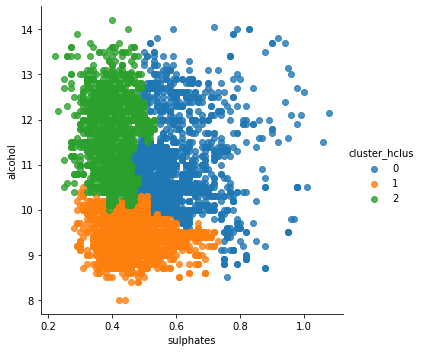

In [19]:
sns.lmplot(fit_reg=False,x='sulphates',y='alcohol',data=wine,hue='cluster_hclus')

In [20]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9]

In [21]:
KMeans?

In [22]:
for k in range_n_clusters:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(wine_std)
    
    print(k,silhouette_score(wine_std,kmeans.labels_))

2 0.373763313307855
3 0.4108301812144841
4 0.3856392789444225
5 0.33526285102300923
6 0.34757490320612566
7 0.3525919114743281
8 0.35390619494318576
9 0.34608027895532745


In [23]:
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(wine_std)

KMeans(n_clusters=3)

In [24]:
labels = kmeans.labels_
wine["cluster"]=labels

In [44]:
wine

,sulphates,alcohol,cluster_hclus,cluster
0,0.45,8.8,1,0
1,0.49,9.5,1,0
2,0.44,10.1,1,0
3,0.40,9.9,1,0
4,0.40,9.9,1,0
...,...,...,...,...
4893,0.50,11.2,0,1
4894,0.46,9.6,1,0
4895,0.46,9.4,1,0
4896,0.38,12.8,2,1


In [25]:
wine['cluster'].value_counts()

0    2271
1    1486
2    1141
Name: cluster, dtype: int64

In [26]:
wine.groupby(['cluster'])['sulphates','alcohol'].mean()

C:\Users\Jayanti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,sulphates,alcohol
cluster,,
0,0.457913,9.553068
1,0.418304,11.803163
2,0.646582,10.748785


In [27]:
import seaborn as sns

In [28]:
%matplotlib inline

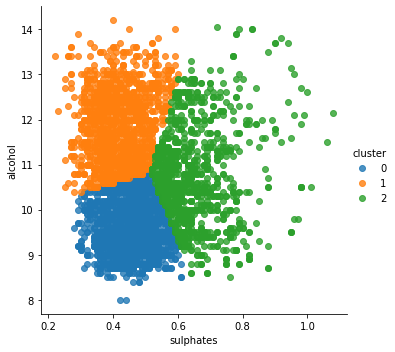

In [29]:
sns.lmplot(fit_reg=False,x='sulphates',y='alcohol',data=wine,hue='cluster')

In [30]:
wine.head()

,sulphates,alcohol,cluster_hclus,cluster
0,0.45,8.8,1,0
1,0.49,9.5,1,0
2,0.44,10.1,1,0
3,0.40,9.9,1,0
4,0.40,9.9,1,0


# DBSCAN

In [31]:
mydata=pd.read_csv("../data/moon_data.csv").iloc[:,1:]
mydata.head()

,X,Y
0,1.045255,0.332214
1,0.801944,-0.411547
2,-0.749356,0.775108
3,0.975674,0.191768
4,-0.512188,0.929997


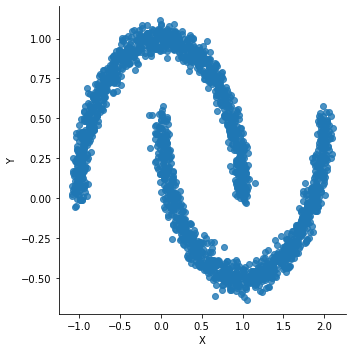

In [32]:
sns.lmplot(data=mydata,x='X',y='Y',fit_reg=False) 

In [33]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(mydata)
mydata["cluster"]=kmeans.labels_

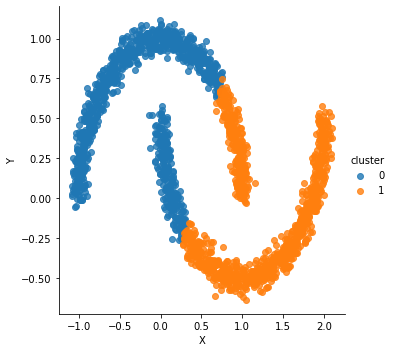

In [34]:
sns.lmplot(data=mydata,x='X',y='Y',hue='cluster',fit_reg=False)

In [35]:
from sklearn.cluster import DBSCAN

In [36]:
del mydata['cluster']

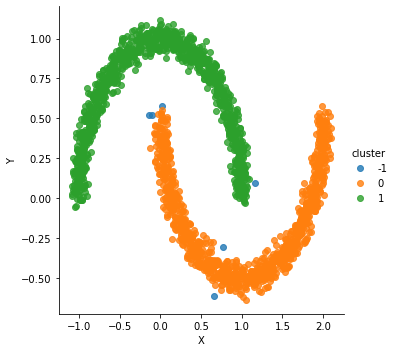

In [37]:
db = DBSCAN(eps=0.1, min_samples=30, metric='euclidean').fit(mydata)

mydata['cluster']=db.labels_
sns.lmplot(data=mydata,x='X',y='Y',hue='cluster',fit_reg=False)


In [38]:
pd.Series(db.labels_).value_counts()

 1    999
 0    995
-1      6
dtype: int64

# anamoly detection with dbscan

In [39]:
myfile=r'../data/Wholesale customers data.csv'

groc=pd.read_csv(myfile)

groc=groc[["Milk","Grocery"]]

groc_std=pd.DataFrame(scale(groc),columns=list(groc.columns))

In [45]:
groc

,Milk,Grocery,cluster
0,9656,7561,0
1,9810,9568,0
2,8808,7684,0
3,1196,4221,0
4,5410,7198,0
...,...,...,...
435,12051,16027,0
436,1431,764,0
437,15488,30243,0
438,1981,2232,0


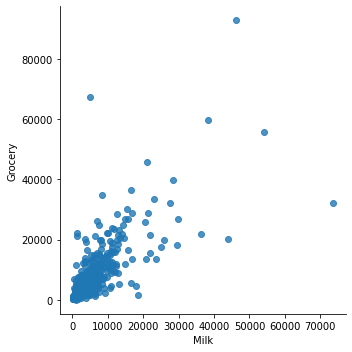

In [40]:
sns.lmplot(x='Milk',y='Grocery',data=groc,fit_reg=False)

In [41]:
r=np.linspace(0.5,4,10)
for epsilon in r:
    db = DBSCAN(eps=epsilon, min_samples=20, metric='euclidean').fit(groc_std)
    labels = db.labels_
#     n_clust=len(set(labels))-1
    outlier=np.round((labels == -1).sum()/len(labels)*100,2)
#     print('Estimated number of clusters: %d', n_clust)
    print("For epsilon =", epsilon ,", percentage of outliers is: ",outlier)

For epsilon = 0.5 , percentage of outliers is:  9.77
For epsilon = 0.8888888888888888 , percentage of outliers is:  4.55
For epsilon = 1.2777777777777777 , percentage of outliers is:  2.05
For epsilon = 1.6666666666666667 , percentage of outliers is:  1.59
For epsilon = 2.0555555555555554 , percentage of outliers is:  1.36
For epsilon = 2.4444444444444446 , percentage of outliers is:  1.14
For epsilon = 2.8333333333333335 , percentage of outliers is:  0.91
For epsilon = 3.2222222222222223 , percentage of outliers is:  0.68
For epsilon = 3.611111111111111 , percentage of outliers is:  0.68
For epsilon = 4.0 , percentage of outliers is:  0.45


In [46]:
db = DBSCAN(eps=2.7, min_samples=20, metric='euclidean').fit(groc_std)
groc['cluster']=db.labels_

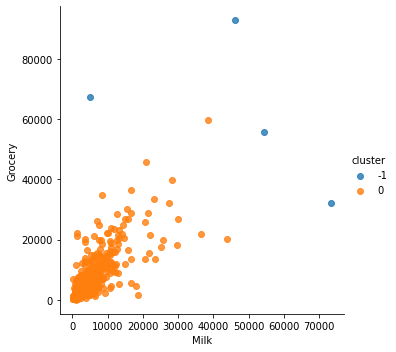

In [47]:
sns.lmplot(x='Milk',y='Grocery',data=groc,fit_reg=False,hue='cluster')